In [1]:
'''
 swing up pendulum with limited torque
'''
import sympy as sp
import numpy as np

import sys
sys.path.append('../')

from CDDP import DDP
from CDDP.utils import GetSyms, Constrain, Bounded
from CDDP.containers import Dynamics, Cost

import matplotlib.pyplot as plt

In [2]:
N = 200
#time step in R(N*1)
dt0 = .015
dts = np.ones((N,1))*dt0

#call dynamics container
dynS = Dynamics(2,dts)

[n_x, n_u] = [dynS.n_x, dynS.n_u]
#Construct cost to swing up Pendulum
x, u = GetSyms(n_x, n_u)
#initial state
#theta = pi --> sin(theta) = 0, cos(theta) = -1
x0 = np.array([0, 0, 0, 0])
#theta = 0 --> sin(theta) = 0, cos(theta) = 1
x_goal = np.array([0, np.pi, 0, 0])

Q  = np.diag([1, 10, 1, 1])*0
R  = np.diag([0.3])*0
QT = np.diag([10, 1000, 10, 10])
#Add constraints on torque input (2Nm to -2Nm)
cons = Bounded(u, high = [1.5], low = [-1.5])
SwingUpCost = Cost.QR(Q, R, QT, x_goal, cons)



..\CDDP\controller.py:52: NumbaWarning: Cannot cache compiled function "run_ddp" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  @numba.njit(cache=True)


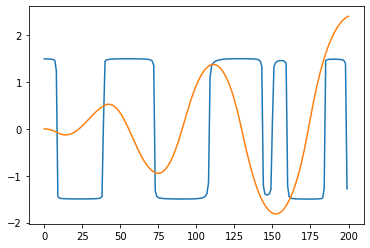

In [3]:
controller = DDP(dynS, SwingUpCost)

us0 = np.random.randn(200, n_u)*0.01
xs, us, cost_trace = controller.fit(x0, us0, dts,maxiters=500)

plt.figure(1)
plt.plot(us)
plt.plot(xs[:,1])

[-0.35958053  2.40362243  0.12681953  0.83548941]


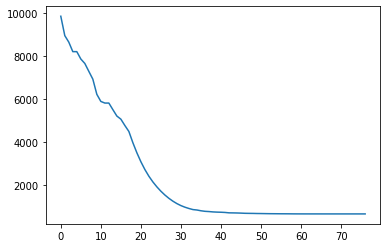

In [4]:
print(xs[-1,:])
plt.plot(cost_trace)